In [105]:
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import gridspec

import scipy

plt.rcParams["figure.figsize"]=8,8
%matplotlib notebook



In [140]:
N=1000
lambd = 700*10**(-9)
R = 1*10**(-3)
D = 2.

x = np.linspace(0,0.0001,N)
x = np.append(-np.flip(x[1:]),x)

y = np.linspace(0,0.0001,N)
y = np.append(-np.flip(y[1:]),y)

X = np.tile(x,(len(y),1))
Y = -np.tile(y,(len(x),1)).T


u = 2*np.pi * R * np.sin( np.arctan(  ( np.sqrt(X**2 + Y**2) )/ D )  )/lambd
u[u==0] = 10**(-9)
IM = ( 2 * scipy.special.jv(1,u) / u )**2
#IM = IM*10
#IM[IM>1.] = 1.


<IPython.core.display.Javascript object>


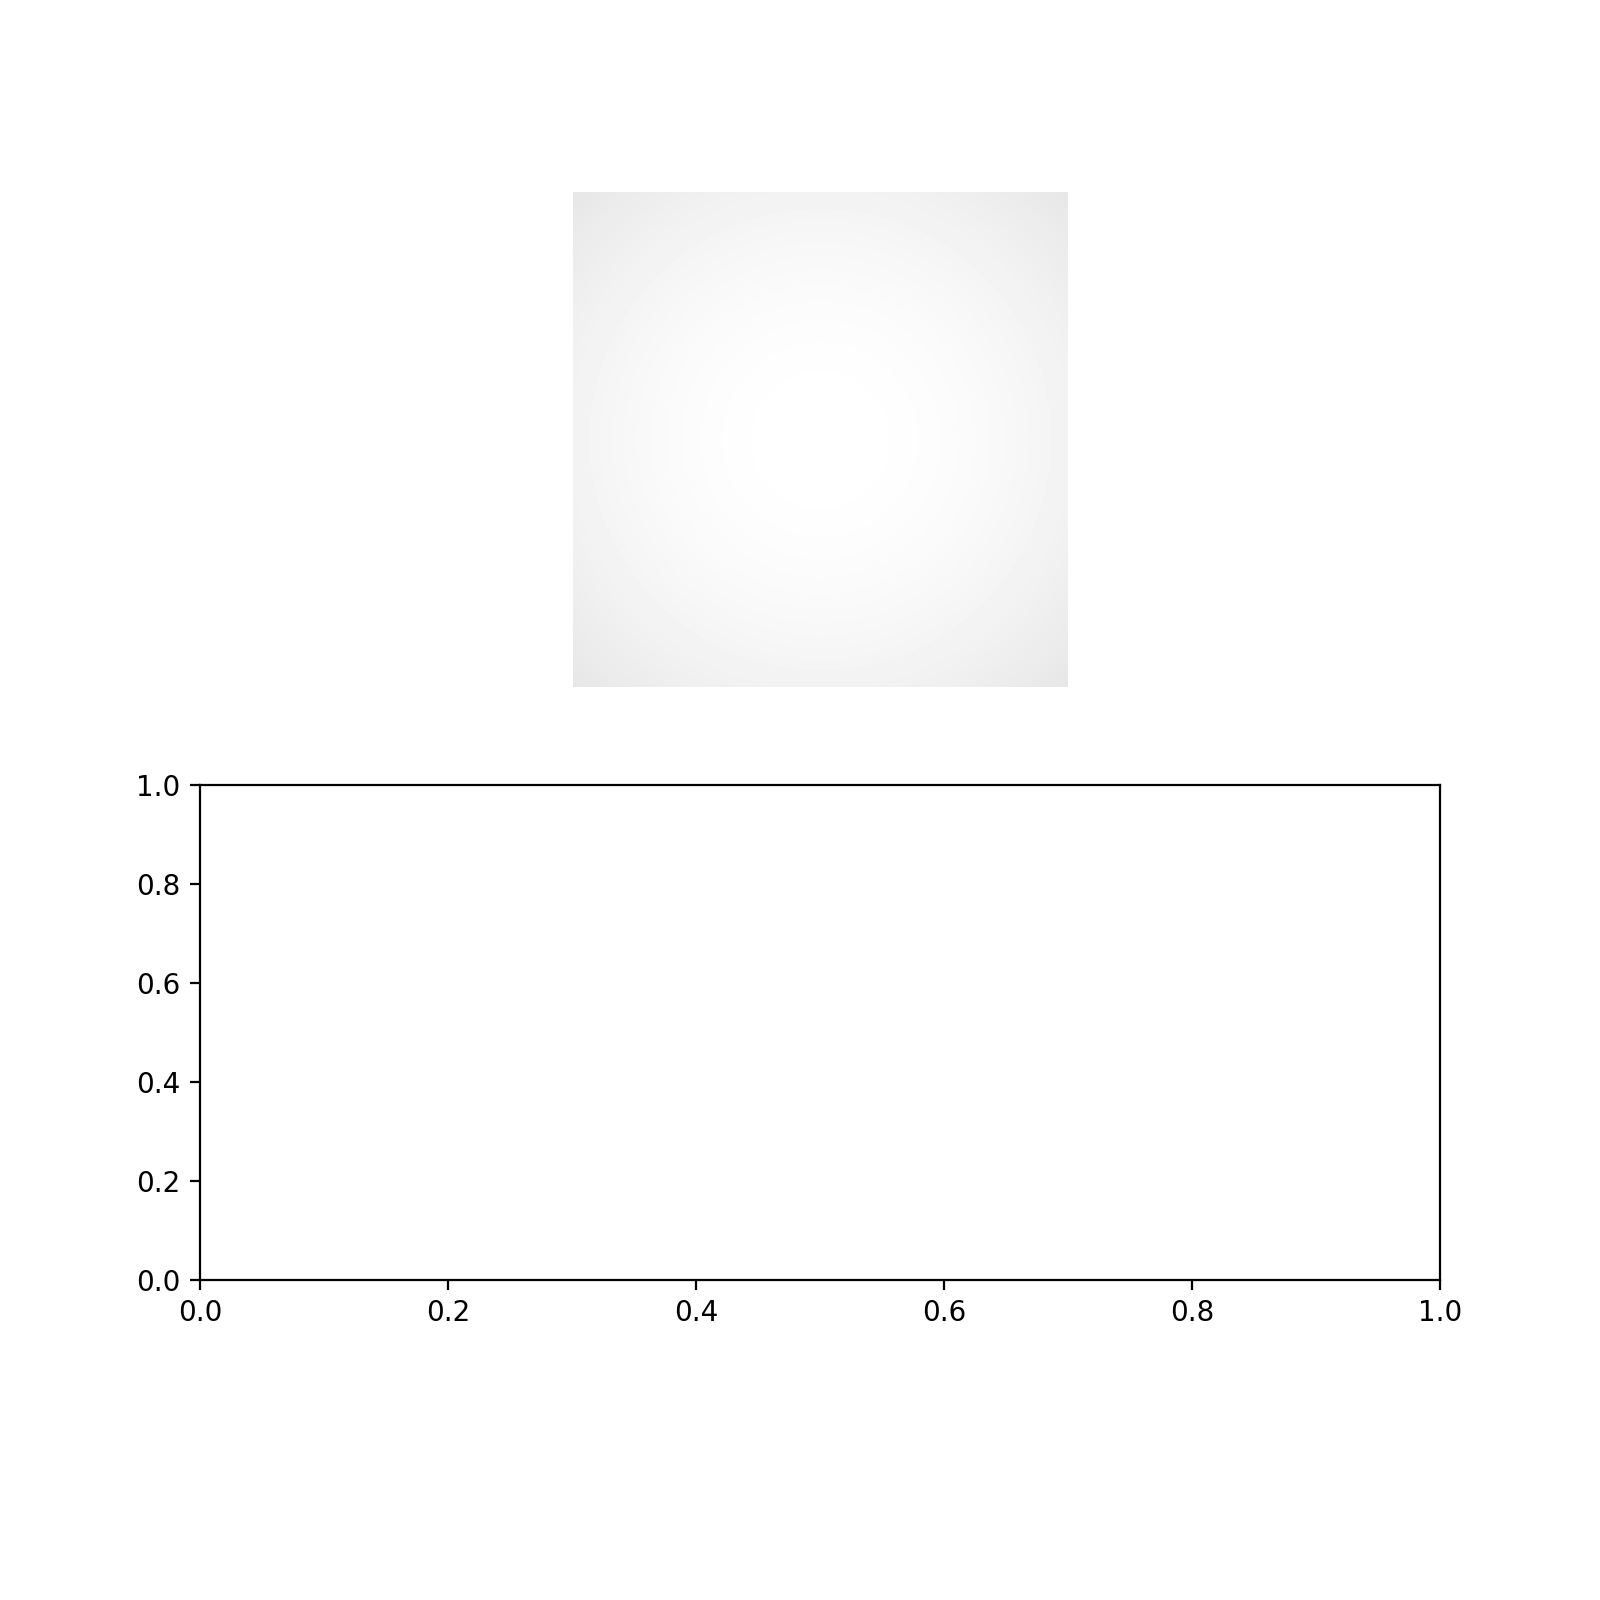

In [142]:
fig = plt.figure()
plt.subplots_adjust(bottom=0.2)
fig.canvas.set_window_title('Nombre de Fresnel')

gs = gridspec.GridSpec(2, 1, height_ratios=[5, 5])
ax = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# ax[0]: image 2D de l'éclairement
# ax[1]: image 1D de l'éclairement

ax[0].axis('off')

#ax[1].axis(fontsize = 15)
#ax[1].set_xlabel('X (m)', fontsize=15)
#ax[1].set_ylabel('Eclairement', fontsize=15)
#ax[1].set_ylim(0, 1.0)

image_eclairement = ax[0].imshow(IM, cmap='gray', vmin=0, vmax=1.0)
plt.show()


<IPython.core.display.Javascript object>


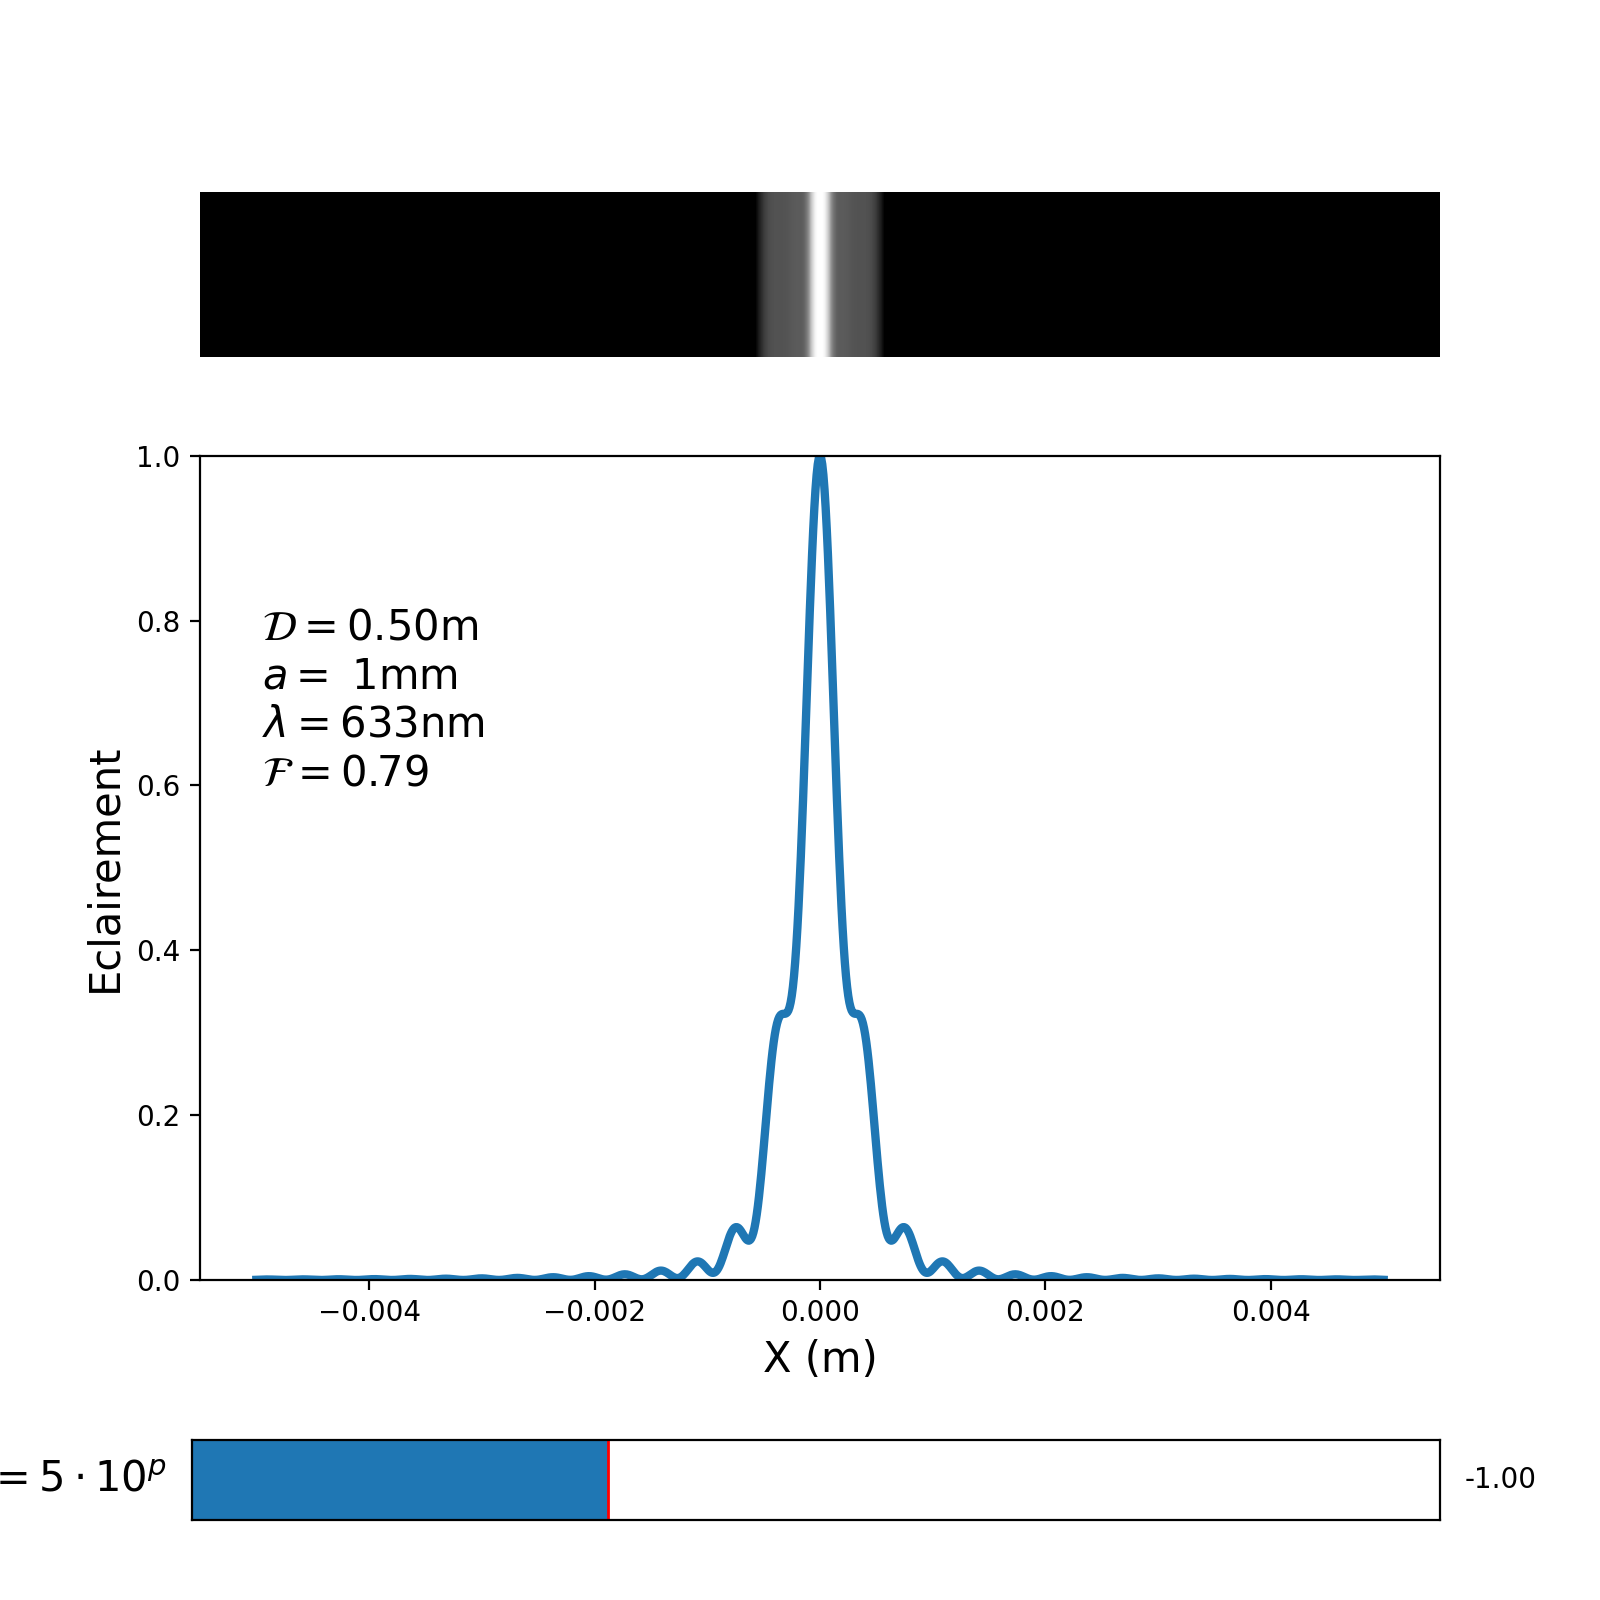

/Library/Python/3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


In [144]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib import gridspec

lamb = 632.8e-9 # longueur d'onde
D        = 0.5          # distance fente-objet
a        = 1e-3         # largeur de la fente

""" -----------------------
    Paramètres de calcul
    discrétisation de l'écran et de la fente
    ----------------------- """
N_ecran = 1000
N_fente = 100


""" -----------------------
    Création fenêtre et axes
    ----------------------- """
fig = plt.figure()
plt.subplots_adjust(bottom=0.2)
fig.canvas.set_window_title('Nombre de Fresnel')

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5])
ax = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# ax[0]: image 2D de l'éclairement
# ax[1]: image 1D de l'éclairement

ax[0].axis('off')

ax[1].axis(fontsize = 15)
ax[1].set_xlabel('X (m)', fontsize=15)
ax[1].set_ylabel('Eclairement', fontsize=15)
ax[1].set_ylim(0, 1.0)

# Slider
axD = plt.axes([0.12, 0.05, 0.78, 0.05])
sD = Slider(axD, '$\mathcal{D}=5\cdot10^p$', -2, 1, valinit=-1)
sD.label.set_size(15)

# Mise à jour du sider

def update(val):
        global D
        # Calcul de D
        D = 5*10**val

        # Calcul de l'éclairement
        X, eclairement, eclairement_2D = process()

        # Maj des graphs
        line.set_data(X, eclairement)
        image_eclairement.set_data( eclairement_2D )
        image_eclairement.vmax()
        ax[1].set_xlim(X[0],X[-1])

        text.set_text(text_update())
        text.set_position((X[0]*0.99, 0.6))

        fig.canvas.draw_idle()

sD.on_changed(update)


""" --------------------
    Post-traitement de l'éclairement 2D
    Modification du contraste
    --------------------"""
def contraste(Y):
        # -- Contraste réel (peu visible)
        # return Y
        # -- Contraste mofié, fait resortir les petites variations 
        return ((Y-0.5)*1.6)**3+0.5


""" Principe de Huygens-Fresnel """
def huygens_fresnel(x, X, D):
        PM = np.sqrt( (X-x)**2 + D**2 )
        return np.exp(1j*2*np.pi*PM/lamb)/PM

""" Intégration par méthode des trépèzes """
def integrate(l, x_pas):
        s = (l[0]+l[-1])/2 + sum(l[1:-1])
        return s / x_pas

        
def E(x, X):
        R = []
        for Xi in X:
                integrale = integrate( huygens_fresnel(x, Xi, D) , x[1]-x[0] )
                R.append(np.absolute(integrale)**2)

        return np.array(R)



""" --------------------
        Calcul de l'éclairement sur l'écran
        et post-traitement
        --------------------"""
def process():

        # Discrétisation de la fente
        x = np.linspace(-a/2, a/2, N_fente)

        # Discrétisation de l'écran (demi écran)
        X = np.linspace(0, 10*a*D, N_ecran//2)

        # Calcul de l'éclairement sur le demi écran
        Y = E(x, X)

        # reconstruction par symétrie de la solution sur tout l'écran
        X = np.append(-1*X[::-1], X)

        Eclairement = np.append(Y[::-1], Y)

        # Normalisation de l'éclairement
        Eclairement /= max(Eclairement)

        # Eclairement pour la figure 2D, modification du contraste éventuellement
        Z = 1 - np.array([contraste(Eclairement)])

        return X, Eclairement, Z


""" Retourne une chaîne de caractère à afficher """
def text_update():
        d_str = '$\mathcal{D}=$'+'{:2.2f}m'.format(D)
        l_str = '$\lambda=$'+'{:2.0f}nm'.format(lamb*1e9)
        a_str = '$a=$'+'{:2.0f}mm'.format(a*1e3)
        f_str = '$\mathcal{F}=$'+'{:2.2f}'.format((a/2)**2/(lamb*D))
        
        
        return d_str+'\n'+a_str+'\n'+l_str+'\n'+f_str

""" --------------------
        Affichage des courbes
        --------------------"""
X, eclairement, eclairement_2D = process()

ax[1].axvline

line, = ax[1].plot(X, eclairement, linewidth=3)

image_eclairement = ax[0].imshow(eclairement_2D, interpolation='bessel',
                            origin='bottom',
                            aspect='auto',
                            vmin=0,
                            vmax=0.7,
                            cmap='Greys')

text = ax[1].text(X[0]*0.99, 0.6, text_update(), fontsize=15)

plt.show()



In [82]:
for i in range(0,np.shape(IM)[1]): 
    for j in range(0,np.shape(IM)[0]) : 
        u = 2*np.pi * R * np.sin( np.arctan(  ( np.sqrt(x[i]**2 + y[j]**2) )/ D )  )/lambd
#        if u==0 :  IM[j,i] = 1
#        else : IM[j,i] = ( 2 * scipy.special.jv(1,u) / u )**2
        

KeyboardInterrupt: 

In [178]:
a = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8] ])
b = np.array([[5, 6], [7, 8]])
c = np.flip(a[:,1:], axis=1)
print(c)
C=np.concatenate((c,a), axis=1)
print(C)
C= np.concatenate((np.flip(C[1:,:], axis=0)  ,C), axis=0)
print(C)
C=C[:,1:4]
print(C)
np.shape(C)

[[3 2]
 [5 4]
 [8 7]]
[[3 2 1 2 3]
 [5 4 3 4 5]
 [8 7 6 7 8]]
[[8 7 6 7 8]
 [5 4 3 4 5]
 [3 2 1 2 3]
 [5 4 3 4 5]
 [8 7 6 7 8]]
[[7 6 7]
 [4 3 4]
 [2 1 2]
 [4 3 4]
 [7 6 7]]


(5, 3)

In [174]:
np.int(np.round(1.4))

1